# Land cover of Spain example (local mode)

### Generate training dataset using validated data located at `DB_DIR` environment variable

In [ ]:
from landcoverpy.execution_mode import ExecutionMode
from landcoverpy.workflow import workflow
workflow(execution_mode=ExecutionMode.TRAINING)

### Postprocess generated dataset, called `dataset.csv` (which has been generated in MinIO)

In [ ]:
from landcoverpy.data_postprocessing import postprocess_dataset

input_dataset = "dataset.csv"
land_cover_dataset = "dataset_postprocessed.csv"

postprocess_dataset(input_dataset, land_cover_dataset)

### Train model using postprocessed dataset

In [ ]:
from landcoverpy.model_training import train_model_land_cover

train_model_land_cover(land_cover_dataset, n_jobs = 1)

### Get the tiles in Spain and classify them using the trained model

In [5]:
from landcoverpy.utilities.aoi_tiles import get_list_of_tiles_in_mediterranean_basin

workflow(execution_mode=ExecutionMode.FOREST_PREDICTION, tiles_to_predict=get_list_of_tiles_in_mediterranean_basin())

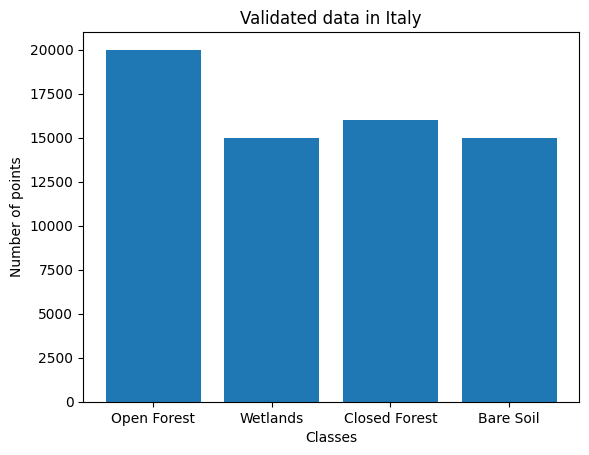

In [4]:
import matplotlib.pyplot as plt

# Datos
clases = ['Open Forest', 'Wetlands', 'Closed Forest', 'Bare Soil']
valores = [20000, 15000, 16000, 15000]

# Configuración del gráfico de barras
plt.bar(clases, valores)

# Etiquetas de los ejes
plt.xlabel('Classes')
plt.ylabel('Number of points')

# Título del gráfico
plt.title('Validated data in Italy')

# Mostrar el gráfico
plt.show()